# Code Usage
This notebook demonstrates how to use the functions to calculate the alignment parameters.

Import the functions by
```python=
from GetAL import *
```
## Available Functions

#### GetEign

`GetEign(CorePosX, CorePosY, CoreWeight=None)`

Calculates the eigenvalues and eigenvectors (principal axes) for a set of 2D core positions by solving the (weighted) principal component analysis (PCA).

Parameters:
* *CorePosX*: 1D array representing the core positions along the x-axis in pixels.
* *CorePosY*: 1D array representing the core positions along the y-axis in pixels.
* *CoreWeight*: 1D array (optional) representing the weights associated with each core. If specified, the PCA calculation incorporates these weights.

Return:
* *Eign*: The eigenvalues along the two eigenvectors.
* *EignVec*: The eigenvectors or principal axes.

#### GetAL

`GetAL(CorePosX, CorePosY, CoreWeight, Simga_mPCA, Simga_mWPCA)`

Obtain the alignment parameters.

Parameters:
* *CorePosX*: 1D array representing the core positions along the x-axis in pixels.
* *CorePosY*: 1D array representing the core positions along the y-axis in pixels.
* *CoreWeight*: 1D array representing the weights associated with each core.
* *Simga_mPCA*: The characteristic minor axis length obtained from `GetEign` when *CoreWeight* is omitted.
* *Simga_mWPCA*: The characteristic minor axis length obtained from `GetEign` when *CoreWeight* is specified.

Return:
* *ALuw*: The unweighted alignment parameter (Equation 2 in the accompanying paper).
* *ALw*: The weighted alignment parameter(Equation 3 in the accompanying paper).

---

## Example
The following script demonstrates how to generate the test clumps described in Section 2.1 of the accompanying paper.

Clump 0: ALuw = 2.32, ALw = 2.86

Clump 1: ALuw = 4.21, ALw = 4.19

Clump 2: ALuw = 2.24, ALw = 2.29

Clump 3: ALuw = 3.67, ALw = 3.73

Clump 4: ALuw = 5.63, ALw = 5.64

Clump 5: ALuw = 2.69, ALw = 2.59

Clump 6: ALuw = 2.73, ALw = 2.79

Clump 7: ALuw = 3.52, ALw = 3.51

Clump 8: ALuw = 3.35, ALw = 4.43

Clump 9: ALuw = 4.86, ALw = 4.68



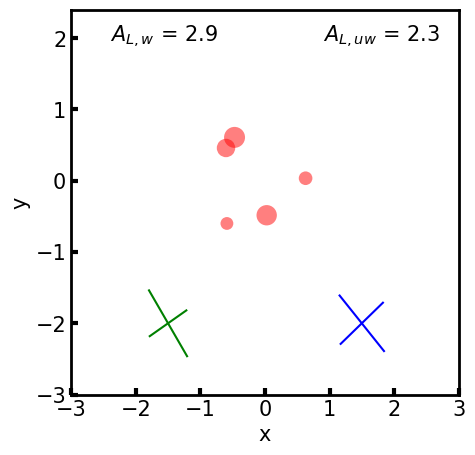

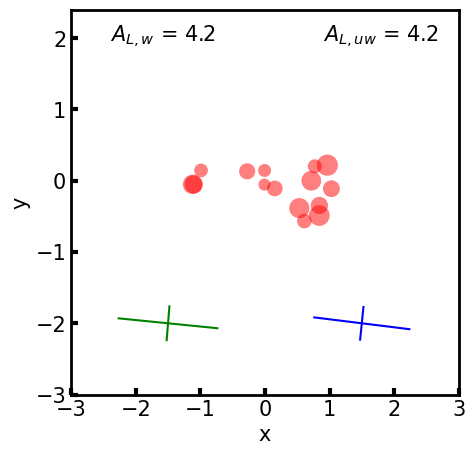

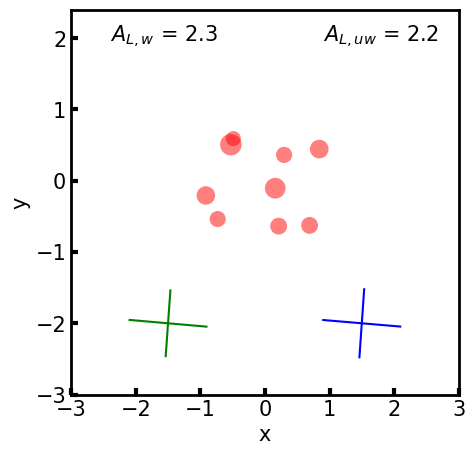

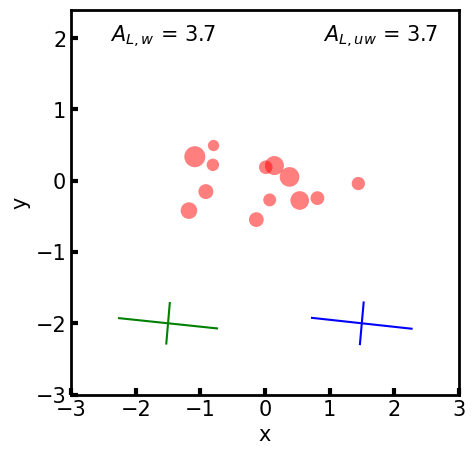

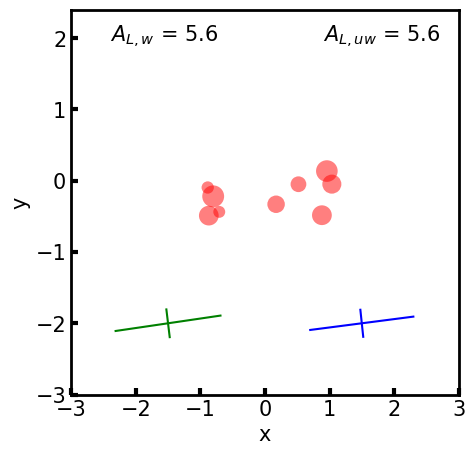

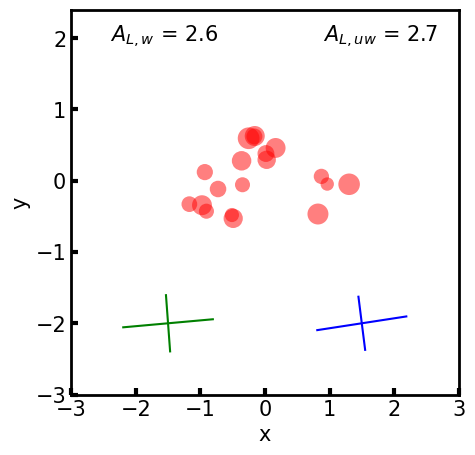

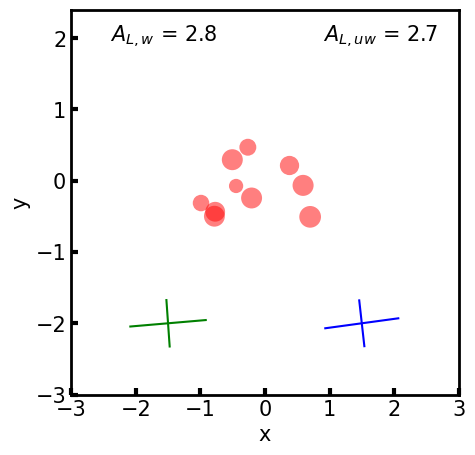

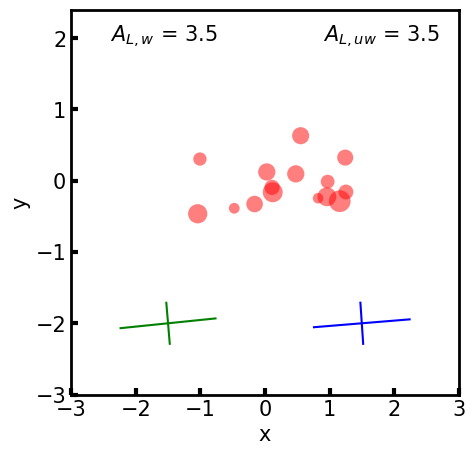

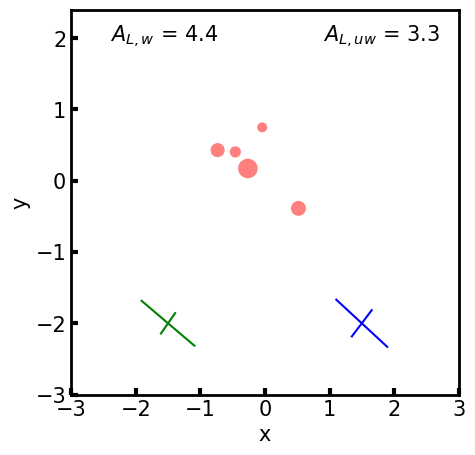

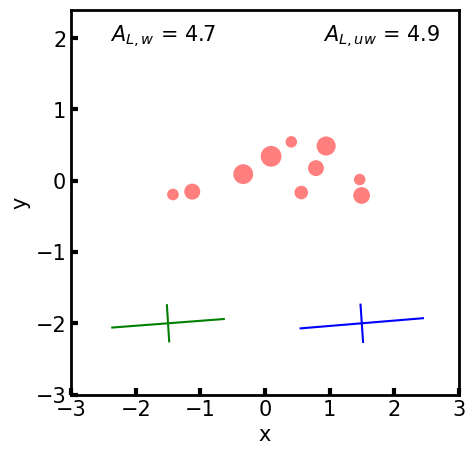

In [1]:
import os
from GetAL import *
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

mpl.rcParams.update({'font.size': 15})
mpl.rcParams['axes.linewidth'] = 2
mpl.rcParams['patch.linewidth'] = 2
mpl.rcParams['xtick.major.size'] = 5
mpl.rcParams['xtick.major.width'] = 3
mpl.rcParams['xtick.direction'] = "in"
mpl.rcParams['xtick.minor.size'] = 5
mpl.rcParams['xtick.minor.width'] = 3
mpl.rcParams['ytick.major.size'] = 5
mpl.rcParams['ytick.major.width'] = 3
mpl.rcParams['ytick.direction'] = "in"
mpl.rcParams['ytick.minor.size'] = 5
mpl.rcParams['ytick.minor.width'] = 3 

def InsideClump(CoreX, CoreY, ClumpSizeX, ClumpSizeY):
    return CoreX**2/ClumpSizeX**2 + CoreY**2/ClumpSizeY**2 < 1

def RunClassification(SampleNum):
    count = 0

    # Creating images 
    while count < SampleNum:
        NumCore  = rng.choice(np.arange(NumCoreMin, NumCoreMax+1)) # Randomly select core number
        ClumpAR  = rng.uniform(ClumpARMin, ClumpARMax)             # Randomly select clump aspect ratio
        ClumpMin = np.sqrt(ClumpArea/ClumpAR)                      # Calculate clump minor axis length (for boundary)
        ClumpMax = ClumpAR*ClumpMin                                # Calculate clump major axis length (for boundary)
        
        CorePosX   = []
        CorePosY   = []
        CoreWeight = []
        for core_id in range(0, NumCore):
            while True:
                CoreX = rng.uniform(-0.5*ClumpMax, 0.5*ClumpMax)
                CoreY = rng.uniform(-0.5*ClumpMin, 0.5*ClumpMin)
                if InsideClump(CoreX, CoreY, 0.5*ClumpMax, 0.5*ClumpMin):
                    # Cores should be in an ellipse region
                    break
        
            CoreW = rng.uniform(CoreWMin, CoreWMax) # Randomly select weighting for cores
        
            CorePosX.append(CoreX)
            CorePosY.append(CoreY)
            CoreWeight.append(CoreW)

        CorePosX   = np.array(CorePosX)
        CorePosY   = np.array(CorePosY)
        CoreWeight = np.array(CoreWeight)

        VarPCA, PriAxesPCA     = GetEign(CorePosX, CorePosY)     # Sloving PCA
        MaxLenPCA, MinLenPCA   = np.sqrt(VarPCA)    # Get max. and min. axis length

        VarWPCA, PriAxesWPCA   = GetEign(CorePosX, CorePosY, CoreWeight)     # Sloving weighted PCA
        MaxLenWPCA, MinLenWPCA = np.sqrt(VarWPCA)    # Get max. and min. axis length

        ALuw, ALw = GetAL(CorePosX, CorePosY, CoreWeight, MinLenPCA, MinLenWPCA) # Calculate ALw and ALuw

        # plotting
        fig = plt.figure(figsize=(5, 5))
        ax = fig.add_subplot(111)

        scat = ax.scatter(CorePosX, CorePosY, color="r", 
                          s=50*CoreWeight, edgecolor='none', alpha=0.5) # the size  is proportional to the weighting
                
        ax.set_xlim([-Dim, Dim])
        ax.set_ylim([-Dim, 0.8*Dim])
        
        ax.set_xlabel("x")
        ax.set_ylabel("y")

        c = [-1.5, -2] # plot the max. and min. axis length from weighted PCA
        line1 = ax.plot([c[0]-MaxLenWPCA*PriAxesWPCA[0][0], c[0]+MaxLenWPCA*PriAxesWPCA[0][0]], 
                        [c[1]+MaxLenWPCA*PriAxesWPCA[0][1], c[1]-MaxLenWPCA*PriAxesWPCA[0][1]], c="g")
        line2 = ax.plot([c[0]-MinLenWPCA*PriAxesWPCA[1][0], c[0]+MinLenWPCA*PriAxesWPCA[1][0]], 
                        [c[1]+MinLenWPCA*PriAxesWPCA[1][1], c[1]-MinLenWPCA*PriAxesWPCA[1][1]], c="g")
        
        c = [1.5, -2] # plot the max. and min. axis length from unweighted PCA
        line3 = ax.plot([c[0]-MaxLenPCA*PriAxesPCA[0][0], c[0]+MaxLenPCA*PriAxesPCA[0][0]], 
                        [c[1]+MaxLenPCA*PriAxesPCA[0][1], c[1]-MaxLenPCA*PriAxesPCA[0][1]], c="b")
        line4 = ax.plot([c[0]-MinLenPCA*PriAxesPCA[1][0], c[0]+MinLenPCA*PriAxesPCA[1][0]], 
                        [c[1]+MinLenPCA*PriAxesPCA[1][1], c[1]-MinLenPCA*PriAxesPCA[1][1]], c="b")
        
        text1 = ax.text(0.1, 0.93, r'$A_{L, w}$ = %.1f'%ALw, va='center', color = "k", transform=ax.transAxes)
        text2 = ax.text(0.65, 0.93, r'$A_{L, uw}$ = %.1f'%ALuw, va='center', color = "k", transform=ax.transAxes)
        print("Clump %s: ALuw = %.2f, ALw = %.2f\n"%(count, ALuw, ALw))

        plt.savefig("./%s/Clump%s.png"%(OutputPath, count), dpi=150,bbox_inches='tight')
        
        count += 1

if __name__ == '__main__':
    Dim        = 3 # Dimension of the image, if we want to plot...
    NumCoreMin = 5 # Core number min/max
    NumCoreMax = 20
    CoreWMin   = 1 # Core weighting min/max
    CoreWMax   = 5
    ClumpArea  = 4 # Clump area ~ sqrt(Max*Min)
    ClumpARMin = 1 # Clump aspect ratio min/max (for boundary)
    ClumpARMax = 3

    seed = 123
    rng = np.random.default_rng(seed) # set a random seed

    OutputPath = "ExampleImage"

    if not os.path.exists(OutputPath):
        os.mkdir(OutputPath) 

    # Generate 10 test clumps
    RunClassification(10)